In [1]:
# univariate lstm example
import pandas as pd
import numpy as np 
import datetime
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

Date      datetime64[ns]
Period             int64
Value            float64
dtype: object


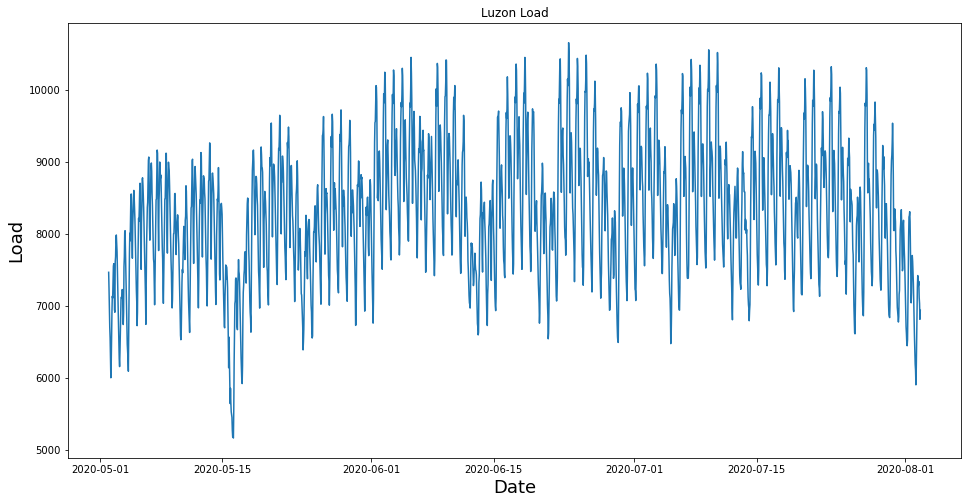

,Date,Period,Value
Date,,,
2020-05-02 00:00:00,2020-05-02 00:00:00,1,7466.0
2020-05-02 01:00:00,2020-05-02 01:00:00,2,7238.1
2020-05-02 02:00:00,2020-05-02 02:00:00,3,6934.5
2020-05-02 03:00:00,2020-05-02 03:00:00,4,6706.9
2020-05-02 04:00:00,2020-05-02 04:00:00,5,6555.9
...,...,...,...
2020-08-02 13:00:00,2020-08-02 13:00:00,14,7340.2
2020-08-02 14:00:00,2020-08-02 14:00:00,15,7115.1
2020-08-02 15:00:00,2020-08-02 15:00:00,16,7032.0


In [3]:
data = pd.read_csv('Volume_Data.csv')
# convert the data type of the column to DateTime
data['Date']= pd.to_datetime(data['Date']) 
print(data.dtypes)

data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index = data['Date']

plt.figure(figsize=(16, 8))
plt.title('Luzon Load')
plt.plot(data['Value'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load', fontsize=18)
plt.show()

data

In [4]:
# extract data for each period --> period 18
data_split = data.loc[data['Period'] == 18]
# define input sequence
data_seq_train = data_split.loc[data_split["Date"] <= "2020-07-27"]
data_seq_test = data_split
data_seq_train

,Date,Period,Value
Date,,,
2020-05-02 17:00:00,2020-05-02 17:00:00,18,6912.1
2020-05-03 17:00:00,2020-05-03 17:00:00,18,6908.0
2020-05-04 17:00:00,2020-05-04 17:00:00,18,7661.7
2020-05-05 17:00:00,2020-05-05 17:00:00,18,7507.5
2020-05-06 17:00:00,2020-05-06 17:00:00,18,7911.7
...,...,...,...
2020-07-22 17:00:00,2020-07-22 17:00:00,18,8643.0
2020-07-23 17:00:00,2020-07-23 17:00:00,18,8307.4
2020-07-24 17:00:00,2020-07-24 17:00:00,18,8470.6


In [5]:
# define input sequence
data_seq_train = list(data_seq_train['Value'])
data_seq_test = list(data_seq_test['Value'])

# data_seq_train

[6912.1,
 6908.0,
 7661.7,
 7507.5,
 7911.7,
 7767.8,
 7732.5,
 7712.1,
 7642.9,
 7589.3,
 7678.3,
 7648.6,
 7360.3,
 6142.8,
 6670.7,
 7316.8,
 7987.0,
 7534.8,
 7957.4,
 7998.9,
 7809.8,
 7642.8,
 7376.8,
 7609.9,
 7718.0,
 8049.6,
 7819.9,
 7965.6,
 8102.3,
 7696.8,
 8492.9,
 8334.2,
 8809.1,
 8447.5,
 8422.2,
 8192.9,
 8473.9,
 8588.2,
 8276.9,
 8236.2,
 7965.9,
 7335.2,
 7469.7,
 7353.6,
 8077.4,
 8493.6,
 8763.1,
 8545.1,
 8035.2,
 7725.1,
 7773.4,
 8575.4,
 8566.2,
 8669.0,
 8794.3,
 8534.8,
 8041.4,
 7431.5,
 8245.4,
 8116.4,
 8609.0,
 8605.5,
 8531.6,
 7813.9,
 7861.6,
 8519.1,
 8582.9,
 8517.3,
 8518.1,
 8493.5,
 7929.7,
 7947.4,
 8051.4,
 8198.0,
 8327.6,
 8542.1,
 8521.5,
 8479.5,
 7940.2,
 8377.0,
 8486.7,
 8643.0,
 8307.4,
 8470.6,
 8165.6,
 7610.0]

In [6]:
# choose a number of time steps
n_steps = 7
# split into samples
X_train, y_train = split_sequence(data_seq_train, n_steps)
X_test, y_test = split_sequence(data_seq_test, n_steps)

# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

#X_train

In [7]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_percentage_error'])
# fit model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
79/79 [==============================] - 0s 5ms/step - loss: 118721400.2025 - mean_absolute_percentage_error: 134.4526
Epoch 2/200
79/79 [==============================] - 0s 177us/step - loss: 156915548.5570 - mean_absolute_percentage_error: 154.5672
Epoch 3/200
79/79 [==============================] - 0s 227us/step - loss: 123497212.4557 - mean_absolute_percentage_error: 137.4450
Epoch 4/200
79/79 [==============================] - 0s 278us/step - loss: 115117664.5063 - mean_absolute_percentage_error: 132.6765
Epoch 5/200
79/79 [==============================] - 0s 303us/step - loss: 112733000.6076 - mean_absolute_percentage_error: 131.3881
Epoch 6/200
79/79 [==============================] - 0s 252us/step - loss: 109679825.2152 - mean_absolute_percentage_error: 129.6038
Epoch 7/200
79/79 [==============================] - 0s 240us/step - loss: 106479329.6203 - mean_absolute_percentage_error: 127.6849
Epoch 8/200
79/79 [==============================] - 0s 227us/step - lo

79/79 [==============================] - 0s 151us/step - loss: 181846.7547 - mean_absolute_percentage_error: 4.2338
Epoch 125/200
79/79 [==============================] - 0s 139us/step - loss: 181768.6349 - mean_absolute_percentage_error: 4.2354
Epoch 126/200
79/79 [==============================] - 0s 139us/step - loss: 181787.2250 - mean_absolute_percentage_error: 4.2385
Epoch 127/200
79/79 [==============================] - 0s 152us/step - loss: 181777.7967 - mean_absolute_percentage_error: 4.2389
Epoch 128/200
79/79 [==============================] - 0s 139us/step - loss: 181769.8873 - mean_absolute_percentage_error: 4.2390
Epoch 129/200
79/79 [==============================] - 0s 151us/step - loss: 181768.8410 - mean_absolute_percentage_error: 4.2396
Epoch 130/200
79/79 [==============================] - 0s 151us/step - loss: 181780.1203 - mean_absolute_percentage_error: 4.2425
Epoch 131/200
79/79 [==============================] - 0s 139us/step - loss: 181788.0890 - mean_absolute

In [8]:
# demonstrate prediction
#x_input = array(data_seq_test)
#x_input = x_input.reshape((1, n_steps, n_features))
y_test_hat = model.predict(X_test, verbose=0)
y_test = list(y_test)
for i in range(len(y_test_hat)):
    print(y_test_hat[i]-y_test[i])

[-133.07568]
[31.510742]
[124.77344]
[25.658203]
[59.09619]
[322.8745]
[1471.2295]
[632.583]
[-197.89844]
[-870.1035]
[-259.25]
[-632.7593]
[-596.1011]
[-263.3081]
[73.46777]
[417.54395]
[114.30322]
[-30.611816]
[-342.88916]
[-60.058105]
[-201.83643]
[-305.89453]
[181.45801]
[-610.3877]
[-302.8789]
[-689.978]
[-172.62793]
[-61.695312]
[193.78516]
[-85.103516]
[-147.0293]
[208.61914]
[214.32617]
[416.73193]
[948.60547]
[614.08887]
[587.8755]
[-306.65576]
[-719.6577]
[-867.959]
[-495.34082]
[143.4375]
[480.86084]
[394.42822]
[-435.20703]
[-331.3838]
[-372.92773]
[-453.13184]
[-114.97949]
[432.1997]
[1027.376]
[40.88867]
[124.68701]
[-405.98047]
[-350.12598]
[-238.00586]
[500.15088]
[396.98584]
[-303.3672]
[-303.09766]
[-154.75098]
[-126.836914]
[-104.76953]
[470.9121]
[416.86182]
[255.14014]
[34.041992]
[-126.11621]
[-328.78125]
[-270.6875]
[-181.12988]
[427.91797]
[-60.83008]
[-146.98926]
[-256.13574]
[141.65625]
[-45.81836]
[243.90576]
[758.30566]
[-325.12012]
[-66.77051]
[352.40576]
[

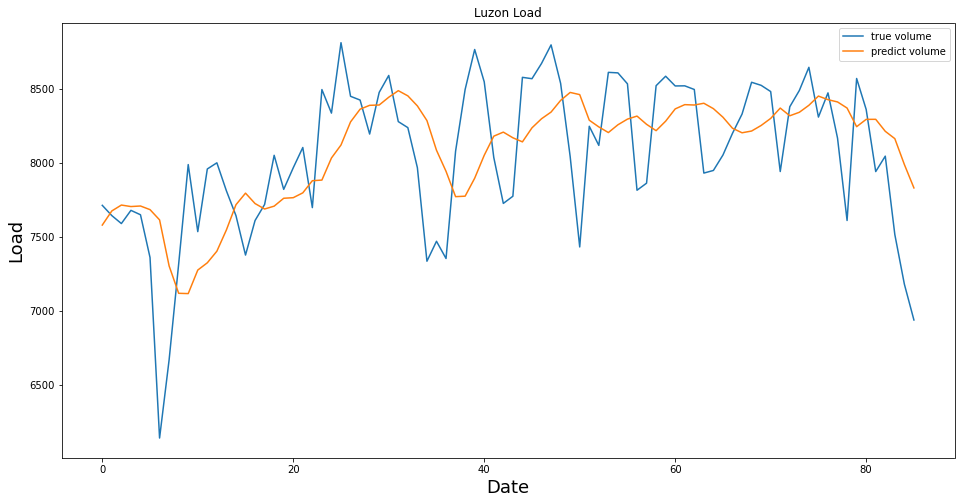

In [9]:
plt.figure(figsize=(16, 8))
plt.title('Luzon Load')
plt.plot(y_test)
plt.plot(y_test_hat)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Load', fontsize=18)
plt.legend(['true volume', 'predict volume'], loc='upper right')

plt.show()


In [10]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test, y_test_hat)

6.11992429227362

In [11]:
len(y_test)

86

In [12]:
len(y_test_hat)

86